In [260]:
import numpy as np

In [261]:
n=50
m=100
lamb=1

In [262]:
theta_opt=np.ones(n)

In [263]:
X=np.random.standard_normal((m, n))

In [264]:
z=np.dot(X, theta_opt)

In [265]:
ps = 1/(1+np.exp(-z))

In [266]:
y=np.random.binomial(1, p=ps)

In [267]:
y[y==0]=-1

In [268]:
theta_0 = np.random.standard_normal(n)

In [269]:
beta=100
alpha=1

In [270]:
#plot function values for the first 100 iterations

In [271]:
def calculate_gradient(X, theta, y, lamb):
    u = np.exp(np.multiply(-y, np.dot(X, theta)))
    coef = np.divide(u, 1+u)
    grad = np.dot(np.multiply(coef, -y), X).T + lamb*theta
    return grad

In [272]:
def evaluate_function_value(X, theta, y, lamb):
    first = np.sum(np.log(1+np.exp(np.multiply(-y, np.dot(X, theta)))))
    second = (lamb/2)* np.linalg.norm(theta)**2
    return first+second

In [290]:
def gradient_descient(theta_0, X, y, beta, lamb, T=100):
    theta = theta_0
    func_val_history=np.zeros(T)
    for t in range(T):
        grad = calculate_gradient(X, theta, y, lamb)
        print(f"Gradient Norm: {np.linalg.norm(grad)}")
        theta = theta - (1/beta)*grad
        func_val_history[t] = evaluate_function_value(X, theta, y, lamb)
    return func_val_history

In [291]:
func_val_history = gradient_descient(theta_0, X, y, beta, lamb, T=100)

Gradient Norm: 59.63682812984368
Gradient Norm: 54.27312718325708
Gradient Norm: 48.843496854347634
Gradient Norm: 43.56391244348875
Gradient Norm: 38.620101461851775
Gradient Norm: 34.11605858233999
Gradient Norm: 30.067193652765415
Gradient Norm: 26.58661038166225
Gradient Norm: 23.749667767520563
Gradient Norm: 21.506870950913438
Gradient Norm: 19.721420211546647
Gradient Norm: 18.252310670124423
Gradient Norm: 17.001682859716873
Gradient Norm: 15.909910798351618
Gradient Norm: 14.938710557314232
Gradient Norm: 14.065937347226361
Gradient Norm: 13.283317298858556
Gradient Norm: 12.58797143175384
Gradient Norm: 11.973615387111465
Gradient Norm: 11.42846394905824
Gradient Norm: 10.938045155518228
Gradient Norm: 10.488230460667507
Gradient Norm: 10.06669651887087
Gradient Norm: 9.663290380840726
Gradient Norm: 9.270090748216285
Gradient Norm: 8.881586595039762
Gradient Norm: 8.495012871049594
Gradient Norm: 8.110599954067194
Gradient Norm: 7.731364541125624
Gradient Norm: 7.36221424108

In [282]:
func_val_history

array([170.84878539, 142.86933456, 120.30364808, 102.41288991,
        88.37540246,  77.43583874,  68.93023156,  62.25038124,
        56.88526876,  52.45774795,  48.7169621 ,  45.50204129,
        42.70593461,  40.25313305,  38.08765822,  36.16512406,
        34.44771376,  32.90255402,  31.50208616,  30.22441031,
        29.0528554 ,  27.97506904,  26.98204009,  26.06723392,
        25.22584597,  24.45412654,  23.7487548 ,  23.10629976,
        22.52285297,  21.99390812,  21.51448702,  21.07942112,
        20.68365996,  20.32250909,  19.99176234,  19.6877414 ,
        19.40727489,  19.1476469 ,  18.90653569,  18.68195373,
        18.47219407,  18.2757846 ,  18.09144974,  17.91807896,
        17.75470075,  17.6004613 ,  17.45460689,  17.31646938,
        17.18545403,  17.06102948,  16.94271926,  16.83009468,
        16.72276875,  16.62039111,  16.52264361,  16.42923656,
        16.33990551,  16.25440846,  16.17252339,  16.09404619,
        16.01878883,  15.94657768,  15.87725214,  15.81

In [283]:
def accelerated_gradient_descent(theta_0, X, y, beta, lamb, T=100):
    theta = theta_0
    func_val_history=np.zeros(T)
    a_t=1
    a_tminus1=1
    theta_t=theta_0
    theta_tminus1=theta_0
    
    for t in range(T):
        u_t = theta_t + a_t*(1/a_tminus1 - 1)*(theta_t - theta_tminus1)
        grad=calculate_gradient(X, u_t, y, lamb)
        
        theta_tminus1=theta_t
        theta_t = u_t - (1/beta) * grad
        
        func_val_history[t]=evaluate_function_value(X, theta_t, y, lamb)
        
        a_tminus1=a_t
        a_t = 1/2 * (np.sqrt(np.power(a_t, 4) + 4*np.power(a_t, 2)) - np.power(a_t, 2))
        
    return func_val_history

In [284]:
func_val_history_accelerated=accelerated_gradient_descent(theta_0, X, y, beta, lamb, T=100)

In [285]:
func_val_history_accelerated

array([170.84878539, 142.86933456, 114.54653029,  89.59628796,
        70.22111973,  56.43941422,  46.56979959,  39.19776265,
        33.5402518 ,  29.08158136,  25.48998911,  22.73877935,
        20.80998703,  19.43714572,  18.37401907,  17.51458474,
        16.81931208,  16.26366785,  15.82366941,  15.47565147,
        15.19878321,  14.9765278 ,  14.79649225,  14.64933952,
        14.52766925,  14.42548764,  14.33835681,  14.26380833,
        14.20140249,  14.15207361,  14.11694636,  14.0961884 ,
        14.08840239,  14.09070196,  14.09928693,  14.11020577,
        14.12003489,  14.12631722,  14.12771807,  14.12394319,
        14.11550865,  14.10345326,  14.08905982,  14.07362319,
        14.05828394,  14.04393317,  14.03118267,  14.02038372,
        14.01167285,  14.00502437,  14.00029684,  13.99726938,
        13.9956693 ,  13.99519439,  13.99553268,  13.99638064,
        13.99745961,  13.99852991,  13.99940192,  13.99994297,
        14.00007951,  13.99979376,  13.99911536,  13.99

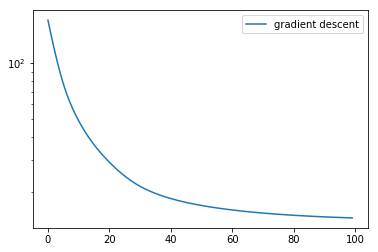

In [286]:
import matplotlib.pyplot as plt
iteration=np.arange(100)
plt.semilogy(iteration, func_val_history, label='gradient descent')
#plt.semilogy(iteration, func_val_history_accelerated, label='accelerated gradient descent')
plt.legend()
plt.show()